In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1

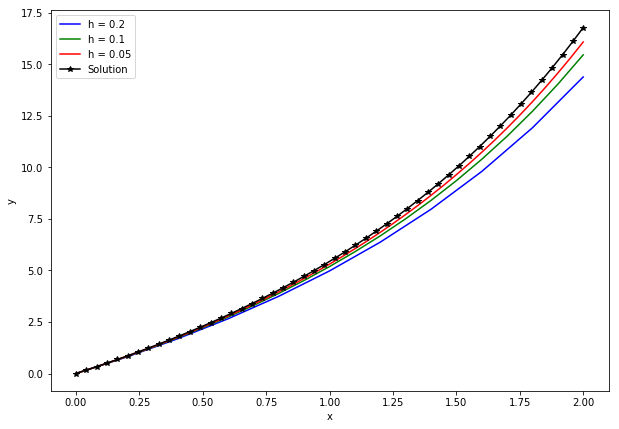

In [2]:
def initialize_all(a,b,y0,h):
    """Given an initial and final time a and b, with y(a)=y0, and step size h, 
    returns several things. 

    Returns:
    X: an array from a to b with n elements, where n is the number of steps from a to b.
    Y: an empty array of size (n, y.size), Y[0]=y0.
    h: the step size.
    n: the number of steps to be taken.
    """
    n = int((b-a)/h+1)
    X = np.linspace(a, b, n)
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X, Y, h, int(n)


def euler(f,X,Y,h,n):
    """Use the Euler method to compute an approximate solution
    to the ODE y' = f(t, y) over X.
    
    Y[0] = y0
    f is assumed to accept two arguments.
    The first is a constant giving the value of t.
    The second is a one-dimensional numpy array of the same size as y.
    
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i'th value of X.
    """
    for i in range(n-1):
        Y[i+1] = Y[i] + h*f(X[i], Y[i])
    return Y

plt.figure(figsize = (10, 7))
ode = lambda x, y: y - 2*x + 4

for h,color in [(.2, 'b'), (.1, 'g'), (.05, 'r')]:
    X,Y,h,n = initialize_all(0,2,0,h)
    estimate = euler(ode, X,Y,h,n)
    plt.plot(X,Y, color, label = 'h = {0}'.format(str(h)))

solution = lambda x: -2 + 2*x + 2*np.exp(x)
x = np.linspace(0,2)
plt.plot(x, solution(x), '-*k', label='Solution')

plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

## Problem 2

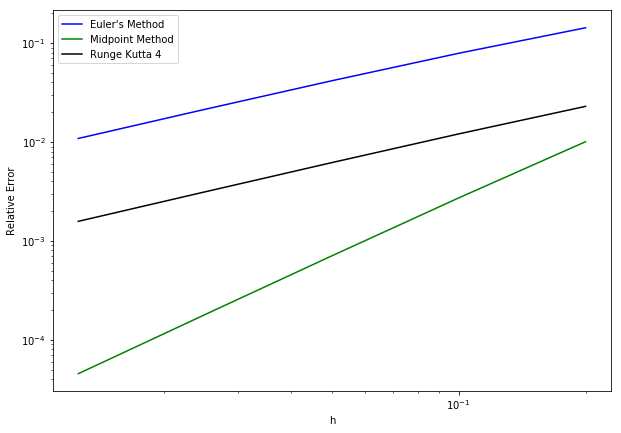

In [3]:
def midpoint(f, X, Y, h, n):
    for i in range(n-1):
        Y[i+1] = Y[i] + h*f(X[i] + (h/2.), Y[i] + (h/2.)*f(X[i], Y[i]))
    return Y

def rk4(f, X, Y, h, n):
    for i in range(n-1):
        k1 = f(X[i], Y[i])
        k2 = f(X[i] + h/2., Y[i] + (h/2.)*k1)
        k3 = f(X[i] + h/2., Y[i] + (h/2.)*k2)
        k4 = f(X[i], Y[i] + h*k3)
        Y[i+1] = Y[i] + (h/6.)*(k1 +  2*k2 + 2*k3+ k4)
    return Y

euler_sol = []
midpoint_sol = []
rk4_sol = []

ode = lambda x, y: y - 2*x + 4

H = [.2,.1,.05,.025,.0125]
for h in H:
    X,Y,h,n = initialize_all(0,2,0,h)
    euler_sol.append(euler(ode,X,Y,h,n)[-1])
    midpoint_sol.append(midpoint(ode,X,Y,h,n)[-1])
    rk4_sol.append(rk4(ode,X,Y,h,n)[-1])

solution = lambda x: -2 + 2*x + 2*np.exp(x)
y2 = solution(2)

euler_error = []
midpoint_error = []
rk4_error = []

plt.figure(figsize=(10,7))
for i in range(len(euler_sol)):
    euler_error.append(np.abs(euler_sol[i] - y2)/np.abs(y2))
    midpoint_error.append(np.abs(midpoint_sol[i] - y2)/np.abs(y2))
    rk4_error.append(np.abs(rk4_sol[i] - y2)/np.abs(y2))

plt.loglog(H, euler_error, 'b', label = "Euler's Method")
plt.loglog(H, midpoint_error, 'g', label = "Midpoint Method")
plt.loglog(H, rk4_error, 'k', label = "Runge Kutta 4")
plt.ylabel("Relative Error")
plt.xlabel("h")
plt.legend()
plt.show()

## Problem 3

In [7]:
def ode_1(z, k=1, m=1):
    return np.array([z[1], -k*(1./m)*z[0]])

def ode_2(z, k=1, m=3):
    return np.array([z[1], -k*(1./m)*z[0]])

Z,Y,h,n = initialize_all(0,20,np.array([0,0]),.025)

